In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import math
import seaborn as sns
import scipy

In [2]:
df=pd.read_csv("//home//mohammed_ajmal//Desktop//Heart_disease_prediction_project//diabetes//new_diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.describe

<bound method NDFrame.describe of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                 

(0, 1.0505709437086093)

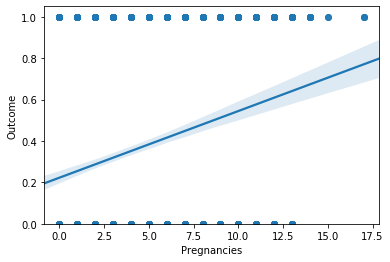

In [7]:
sns.regplot(x="Pregnancies",y="Outcome",data=df)
plt.ylim(0,)

In [8]:
from scipy.stats.stats import pearsonr

In [9]:
col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [10]:
a=[]
b=[]
for i in col:
    pearson_coef,p_value=scipy.stats.pearsonr(df[i],df['Outcome'])
    a.append(pearson_coef)
    b.append(p_value)

In [11]:
print(a)

[0.22443699263363937, 0.4584213024234632, 0.07595808358896639, 0.07604024696581346, 0.12092362183050197, 0.2767255387700317, 0.15545907915694007, 0.2365092471762022]


In [12]:
print(b)

[2.9680175794957296e-24, 1.7240068015317964e-104, 0.0006745060979564642, 0.00066546557163923, 5.814837239554923e-08, 1.746763488169258e-36, 2.7384134507856186e-12, 7.948733933369472e-27]


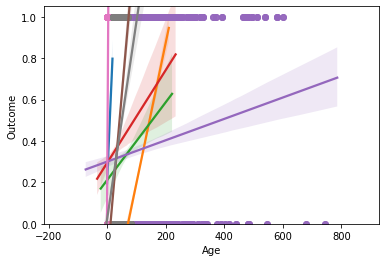

In [13]:
for i in col:
    sns.regplot(x=i,y="Outcome",data=df)
    plt.ylim(0,)

In [14]:
x=df.drop(['Outcome'],axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [15]:
y=pd.DataFrame(df.iloc[:,-1])
y.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
from sklearn import svm

In [19]:
clf=svm.SVC(kernel='linear')
clf.fit(xtrain,ytrain)

/home/mohammed_ajmal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
ypred=clf.predict(xtest)
print(ypred)

[0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 1 0 1 

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
acc=accuracy_score(ytest,ypred)
print(math.floor(acc*100),"%")

78 %


In [23]:
import pickle

In [24]:
pickle.dump(clf, open('diabetes_svm_model.pkl','wb'))
diabetes_svm_model=pickle.load(open('diabetes_svm_model.pkl','rb'))